In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [12]:
dataset = pd.read_csv('HeartDisease.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, 13].values

In [19]:
#missing values
dataset.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 8)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=8)

In [24]:
y_pred = classifier.predict(X_test)

ACC 0.8289473684210527
              precision    recall  f1-score   support

           0       0.88      0.76      0.81        37
           1       0.80      0.90      0.84        39

    accuracy                           0.83        76
   macro avg       0.84      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76


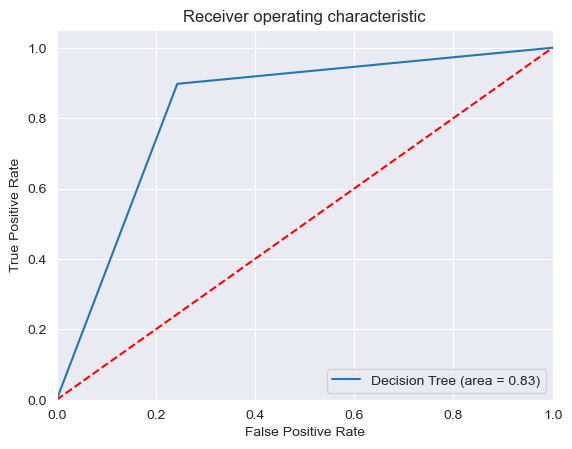

In [26]:
#ACCURACY SCORE
from sklearn.metrics import accuracy_score
print("ACC",accuracy_score(y_test,y_pred))

##CONFUSION MATRIX
from sklearn.metrics import classification_report, confusion_matrix  
cm=confusion_matrix(y_test, y_pred) 

#Interpretation:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()